# Exercise 6.4 Supervised Machine Learning: Regression

# Linear Regression Analysis:
## The variable "Number of Mentions" will be used as the predictor for "COVID-19 Deaths".
## Rationale:
### Each row represents a specific condition for a given age group, state, and time period.
### The "Number of Mentions" variable indicates how many times that specific condition was mentioned on death certificates.
### The "COVID-19 Deaths" variable represents the number of COVID-19 related deaths for that combination of condition, age group, state, and time period.
### Based on the previous analysis in exercise 6.2, these two variables are closely related.
### The linear regression analysis will be used to further explore the relationship between these two variables.

# Contents:

    0. Import Libraries

    1. Loading and Checking the Data

    2. Clean the Data

    3. Exploratory Data Analysis

    4. State Hypothesis

    5. Reshape Variables into NumPy Arrays

    6. Split the Data into Training and Test Sets

    7. Run a Linear Regression on the Data

    8. Visualize the Results

    9. Interpretation of the Results

    10. Check Model Performance Statistics

    11. Compare the Predicted y Values with the Actual y Values in a Dataframe

    12. Thoughts on How Well the Model Performed

    13. Additional Analysis - Top 5 Conditions

    14. Final Interpretation of the Results

# 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Loading and Checking the Data

In [2]:
# Define the path to the data files
path = '/Users/aaronkibler/CF Project 6'

In [3]:
# Load the dataset on COVID-19 deaths and contributing conditions as "df_cov_19"
df_cov_19 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned_Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'))

In [4]:
# Checking the dataset is correctly loaded
print(df_cov_19.head())
print(df_cov_19.info())
df_cov_19.shape

   Data As Of  Start Date    End Date    Year  Month    State  \
0  2023-09-24  2020-01-01  2020-01-31  2020.0    1.0  Alabama   
1  2023-09-24  2020-02-01  2020-02-29  2020.0    2.0  Alabama   
2  2023-09-24  2020-03-01  2020-03-31  2020.0    3.0  Alabama   
3  2023-09-24  2020-04-01  2020-04-30  2020.0    4.0  Alabama   
4  2023-09-24  2020-05-01  2020-05-31  2020.0    5.0  Alabama   

        Condition Group                Condition ICD10_codes Age Group  \
0  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
1  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
2  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
3  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
4  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   

   COVID-19 Deaths  Number of Mentions Flag  
0              0.0                 0.0  NaN  
1              0.0                 0.0  NaN  
2              0.0        

(430560, 13)

# 2. Clean the Data

In [5]:
# Select only the numeric columns necessary for analysis
df_cov_19_numeric = df_cov_19[['Number of Mentions', 'COVID-19 Deaths']]

In [6]:
# Verify results of the changes
print(df_cov_19_numeric.head())
print(df_cov_19_numeric.info())
df_cov_19_numeric.shape

   Number of Mentions  COVID-19 Deaths
0                 0.0              0.0
1                 0.0              0.0
2                 0.0              0.0
3                 0.0              0.0
4                 0.0              0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Number of Mentions  430560 non-null  float64
 1   COVID-19 Deaths     430560 non-null  float64
dtypes: float64(2)
memory usage: 6.6 MB
None


(430560, 2)

# 3. Exploratory Data Analysis

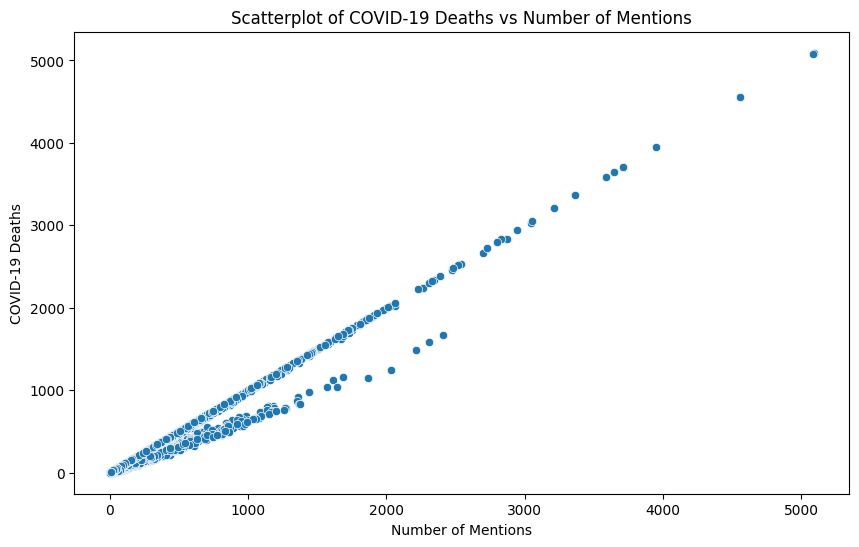

In [7]:
# Scatterplot to visualize the relationship between Number of Mentions and COVID-19 Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cov_19_numeric, x='Number of Mentions', y='COVID-19 Deaths')
plt.title('Scatterplot of COVID-19 Deaths vs Number of Mentions')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
plt.show()

# 4. State Hypothesis

## Hypothesis: If the number of mentions of a condition on death certificates is higher, then the COVID-19 death count will be significantly higher.


# 5. Reshape Variables into NumPy Arrays

### X = the independent variable
### Y = the dependent variable.
### "Number of Mentions" is the predictor (independent variable) and "COVID-19 Deaths" is the response (dependent variable)

In [8]:
# Define the independent variable (x) and the dependent variable (y)
X = df_cov_19_numeric['Number of Mentions'].values.reshape(-1, 1)
y = df_cov_19_numeric['COVID-19 Deaths'].values

# 6. Split the Data into Training and Test Sets

In [9]:
# 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [10]:
# Verify the shape of the training and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (301392, 1)
X_test shape: (129168, 1)
y_train shape: (301392,)
y_test shape: (129168,)


# 7. Run a Linear Regression on the Data

### Run a linear regression on the data by first fitting the model to the training set and then creating a prediction for y on the test set.

In [11]:
# Initialize the linear regression model
regression = LinearRegression()

In [12]:
# Fit the model to the training data
regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict on the test data
y_pred = regression.predict(X_test)

# 8. Visualize the Results

### Create a plot that shows the regression line on the test set.

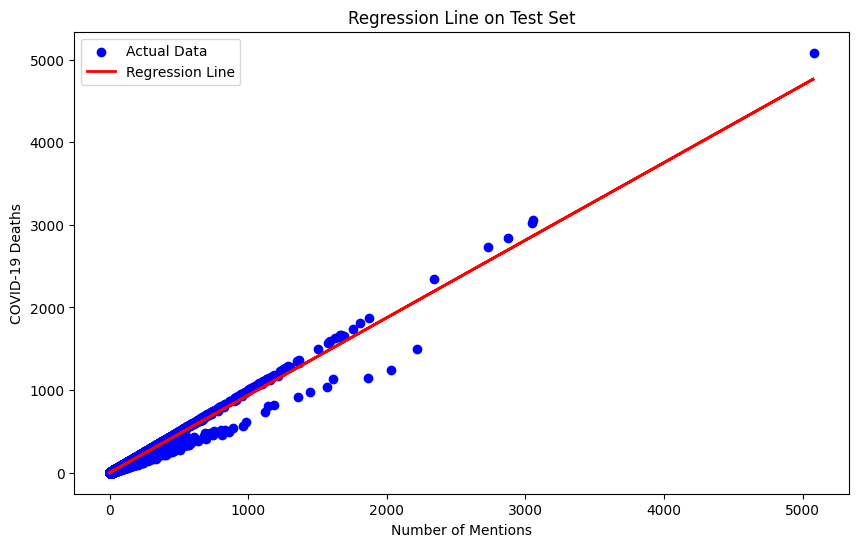

<Figure size 640x480 with 0 Axes>

In [14]:
# Plot actual vs predicted values to visualize model performance
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Line on Test Set')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
plt.legend()
plt.show()

# Export to the "Visualizations" folder
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'regression_line_test_set.png')
plt.savefig(file_name)

# 9. Interpretation of the Results

### The scatterplot and regression line visualization show a clear positive relationship between the "Number of Mentions" of a condition on death certificates and "COVID-19 Deaths". 
### The regression line closely follows the data points, indicating a strong fit.

# 10. Check Model Performance Statistics

In [15]:
# Calculate the mean squared error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 66.74982006174503
R2 Score: 0.9751989073930583


# 11. Compare the Predicted y Values with the Actual y Values in a Dataframe

In [16]:
# Create a dataframe to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [17]:
# Verify the results
print(comparison_df.head(30))
print(comparison_df.info())
comparison_df.shape

    Actual   Predicted
0      0.0   -0.130932
1     55.0   53.355237
2      0.0   -0.130932
3      0.0   -0.130932
4      0.0   -0.130932
5      0.0   -0.130932
6      0.0   -0.130932
7      0.0   -0.130932
8      0.0   -0.130932
9      0.0   -0.130932
10    20.0   34.588160
11    39.0   72.122314
12     4.0    4.560837
13     6.0    2.684130
14     0.0   -0.130932
15   330.0  309.525839
16     0.0   -0.130932
17     0.0   -0.130932
18     1.0    6.437545
19     5.0    5.499191
20     1.0    7.375899
21     4.0    3.622483
22     0.0   -0.130932
23     6.0    4.560837
24     0.0   -0.130932
25     3.0    6.437545
26     0.0   -0.130932
27     4.0    4.560837
28     0.0   -0.130932
29     5.0    7.375899
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129168 entries, 0 to 129167
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Actual     129168 non-null  float64
 1   Predicted  129168 non-null  float64
dtypes: float

(129168, 2)

# 12. Thoughts on How Well the Model Performed

### The relatively low MSE of 66.75 suggests that the model's predictions are close to the actual values. 
### A high R-squared score of 0.975 indicates that approximately 97.5% of the variance in "COVID-19 Deaths" can be explained by the "Number of Mentions" of conditions. 
### Overall, the statistics indicate that this linear regression model is effective in predicting "COVID-19 deaths" based on the "Number of Mentions".

# 13. Additional Analysis - Top 5 Conditions

### Perform additional linear regression analyses focused on the top 5 conditions identified in the previous exercises:
    Influenza and pneumonia
    Vascular and unspecified dementia
    Ischemic heart disease
    Diabetes
    Renal failure

In [18]:
# Filter the dataset to include only the selected conditions
top_conditions = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Ischemic heart disease', 'Diabetes', 'Renal failure']
df_top_conditions = df_cov_19[df_cov_19['Condition'].isin(top_conditions)]

In [19]:
# Verify the results of the filtering
unique_conditions = df_top_conditions['Condition'].unique()
unique_conditions

array(['Influenza and pneumonia', 'Ischemic heart disease', 'Diabetes',
       'Vascular and unspecified dementia', 'Renal failure'], dtype=object)

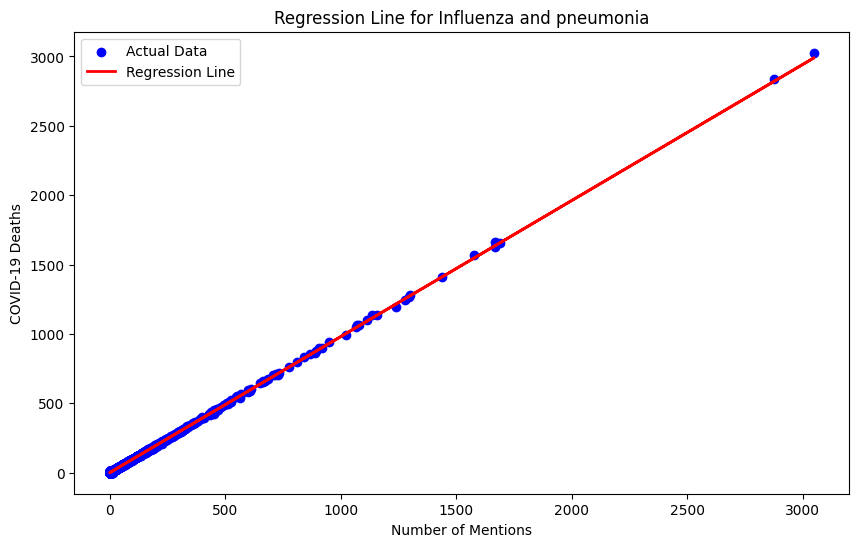

Influenza and pneumonia - Mean Squared Error: 7.265893864299061
Influenza and pneumonia - R2 Score: 0.9994604928144752


<Figure size 640x480 with 0 Axes>

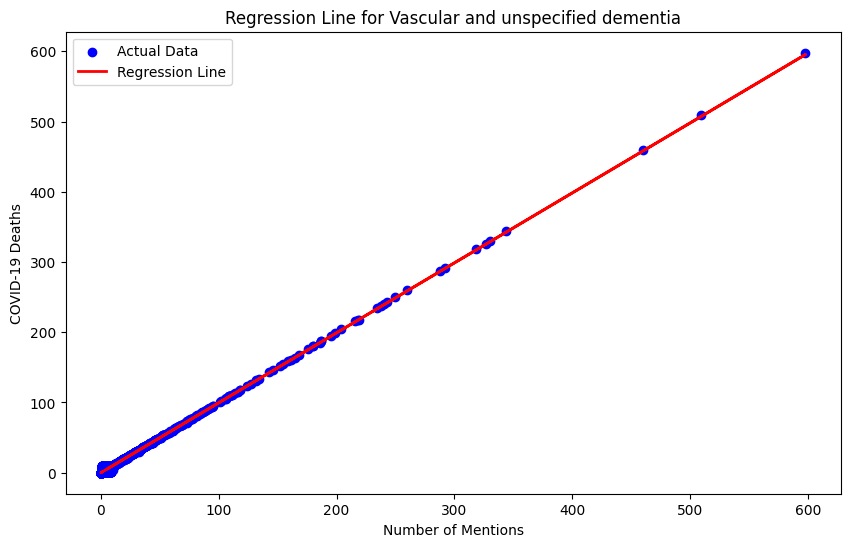

Vascular and unspecified dementia - Mean Squared Error: 3.128760507112853
Vascular and unspecified dementia - R2 Score: 0.994463144431416


<Figure size 640x480 with 0 Axes>

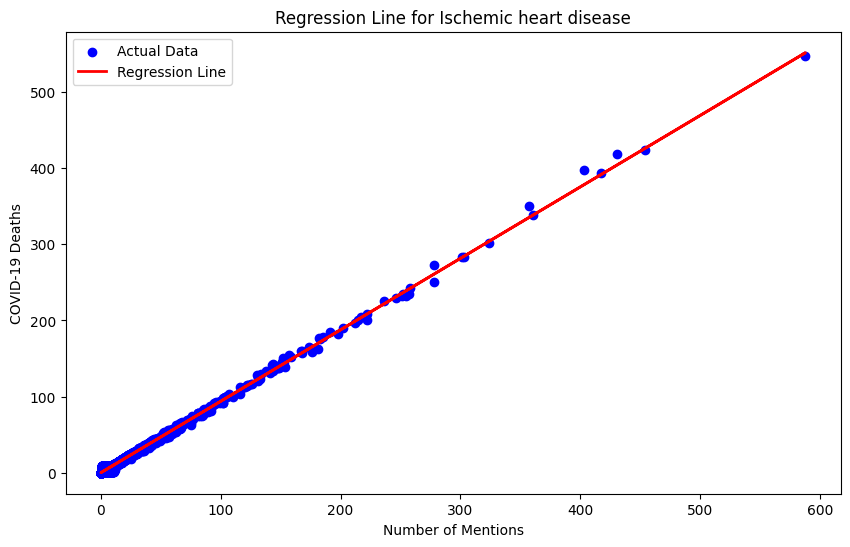

Ischemic heart disease - Mean Squared Error: 5.211566337193695
Ischemic heart disease - R2 Score: 0.9920813335826318


<Figure size 640x480 with 0 Axes>

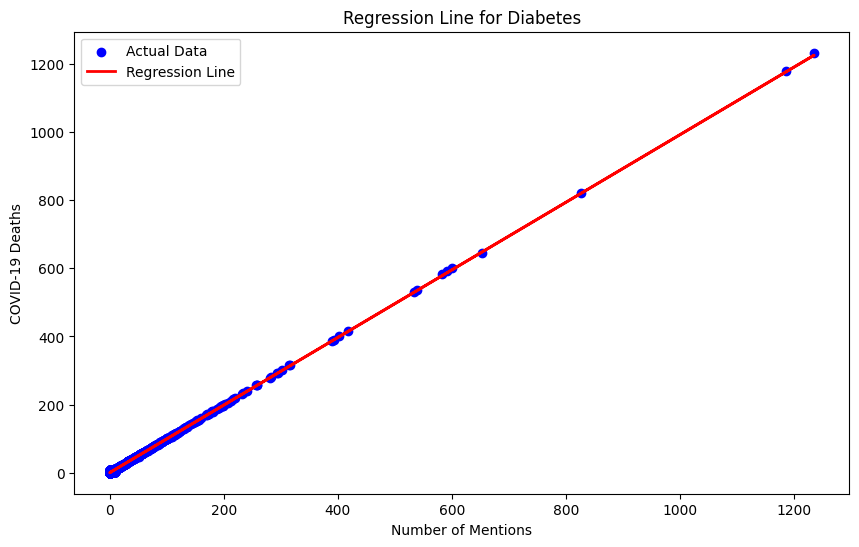

Diabetes - Mean Squared Error: 5.217352411884917
Diabetes - R2 Score: 0.996834998727336


<Figure size 640x480 with 0 Axes>

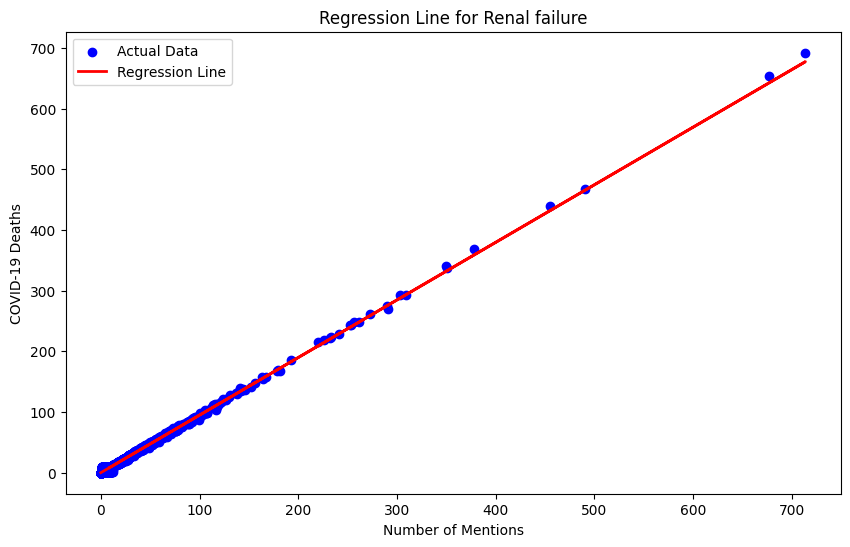

Renal failure - Mean Squared Error: 5.417563545328983
Renal failure - R2 Score: 0.9920714113900603


<Figure size 640x480 with 0 Axes>

In [20]:
# Run the regression analysis for each of the specified conditons using a for loop
for condition in top_conditions:
    df_condition = df_top_conditions[df_top_conditions['Condition'] == condition]
    
    # Define the independent variable (x) and the dependent variable (y)
    X_condition = df_condition['Number of Mentions'].values.reshape(-1, 1)
    y_condition = df_condition['COVID-19 Deaths'].values
    
    # Split the data (70% training, 30% test)
    X_train_cond, X_test_cond, y_train_cond, y_test_cond = train_test_split(X_condition, y_condition, test_size=0.3, random_state=18)
    
    # Initialize the linear regression model
    regression_cond = LinearRegression()
    
    # Fit the model to the training data
    regression_cond.fit(X_train_cond, y_train_cond)
    
    # Predict on the test data
    y_pred_cond = regression_cond.predict(X_test_cond)
    
    # Visualize the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_cond, y_test_cond, color='blue', label='Actual Data')
    plt.plot(X_test_cond, y_pred_cond, color='red', linewidth=2, label='Regression Line')
    plt.title(f'Regression Line for {condition}')
    plt.xlabel('Number of Mentions')
    plt.ylabel('COVID-19 Deaths')
    plt.legend()
    plt.show()
    
    # Check the performance statistics
    mse_cond = mean_squared_error(y_test_cond, y_pred_cond)
    r2_cond = r2_score(y_test_cond, y_pred_cond)
    print(f'{condition} - Mean Squared Error: {mse_cond}')
    print(f'{condition} - R2 Score: {r2_cond}')
    
    # Export the plots to the "Visualizations" folder
    file_name = os.path.join(path, '04 Analysis', 'Visualizations', f'regression_line_{condition.replace(" ", "_").lower()}.png')
    plt.savefig(file_name)

# 14. Final Interpretation of the Results

### The additional analysis focused on the top 5 conditions provides further insights into the relationship between specific conditions and COVID-19 deaths:
    Influenza and pneumonia: MSE = 7.27, R2 = 0.999
    Vascular and unspecified dementia: MSE = 3.13, R2 = 0.994
    Ischemic heart disease: MSE = 5.21, R2 = 0.992
    Diabetes: MSE = 5.22, R2 = 0.997
    Renal failure: MSE = 5.42, R2 = 0.992
### These results show that the model performs exceptionally well across these specific conditions, with lower MSEs and higher R-squared values than the model of all conditions.
### These results reinforce the conclusion that the "Number of Mentions" of these specific conditions is a very strong predictor of "COVID-19 Deaths".

# End